# Content and Objective

+ Show estimation of acf
+ Method: Get rectangular signal and noise, and perform acf estimation with different normalization factors

In [1]:
# importing
import numpy as np
import scipy.signal
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 8) )

# Estimation of ACF

### Parameters 

In [3]:
# parameters: number of samples and according length of acf
N = int( 1e2 )
N_acf_range = np.arange( - N + 1, N, 1 )

# number of realizations for averaging    
N_real = int( 1e0 )

# relative width of rectangular and defining rect function
relative_width_rect = 0.3
N_rect = int( N * relative_width_rect )

rect = np.append( np.ones( N_rect), np.zeros( N - N_rect))

### Define Function for Estimating ACF

In [4]:
########################
# acf estimator
########################
def est_acf(y, est_type):
    """
    estimates acf given a number of observation
    
    Remark: signal is assumed to be starting from 0 to length(y)-1
    
    IN: observations y, est_type (biased / unbiased)
    OUT: estimated acf, centered around 0
    """
    
    N = np.size( y )
    r = np.zeros_like( y )
    
    # loop lags of acf
    for k in np.arange(0, N):
        
        temp = np.sum( y[k:N] * np.conjugate(y[0:(N-k)]) )

        # type of estimator
        if est_type == 'biased':
            r[k] = temp/N
        elif est_type == 'unbiased':
            r[k] = temp/(N-k)
        
    # find values for negative indices
    r_reverse = np.conjugate(r[::-1])     
   
    return  np.append(r_reverse[0:len(r)-1], r)  

### Add Noise and Estimate ACF

In [5]:
# initialize arrays for acf estimation
acf_rect_biased = np.zeros( len( N_acf_range ) )
acf_rect_unbiased = np.zeros( len( N_acf_range ) ) 

acf_noise_biased = np.zeros( len( N_acf_range ) )
acf_noise_unbiased = np.zeros( len( N_acf_range ) ) 

# loop for realizations
for _k in range( N_real ):
    
    # rect function and noise only     
    rect_noisy = rect + np.random.normal(0.0, 0.2, N )
    noise_only = np.random.normal(0.0, 1.0, N )

    acf_rect_biased = 1. / ( _k+1 ) *( _k * acf_rect_biased + est_acf( rect_noisy, 'biased') )
    acf_rect_unbiased = 1. / ( _k+1 ) *( _k * acf_rect_unbiased + est_acf( rect_noisy, 'unbiased') )
    
    acf_noise_biased = 1. / (_k+1) *( _k * acf_noise_biased + est_acf( noise_only, 'biased') )
    acf_noise_unbiased = 1. / (_k+1) *( _k * acf_noise_unbiased + est_acf( noise_only, 'unbiased') )    


### Show Results

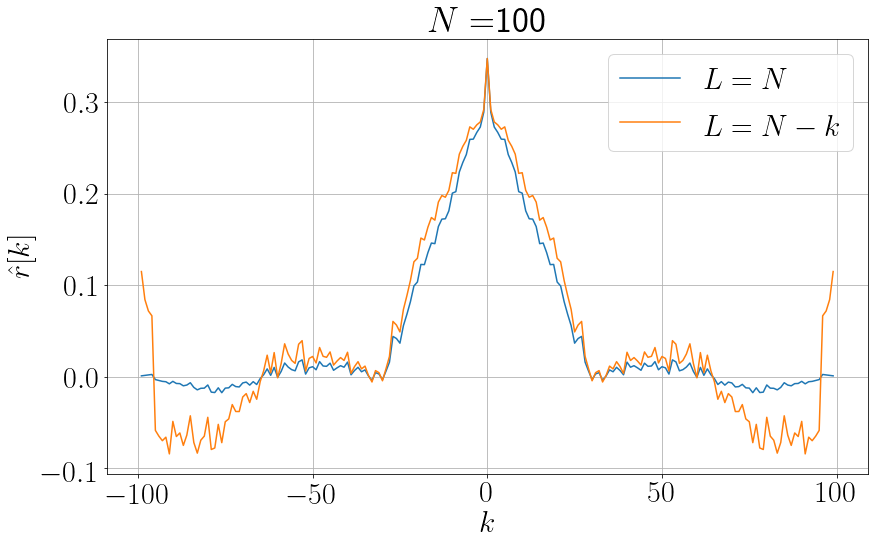

In [6]:
plt.subplot(121)

plt.plot( N_acf_range, acf_rect_biased, label='$L=N$')      
plt.plot( N_acf_range, acf_rect_unbiased, label='$L=N-k$')      

plt.xlabel('$k$')
plt.ylabel('$\hat{r}[k]$')   
plt.grid(True)    
plt.title('$N=$'+str(N))
plt.legend(loc='upper right') 

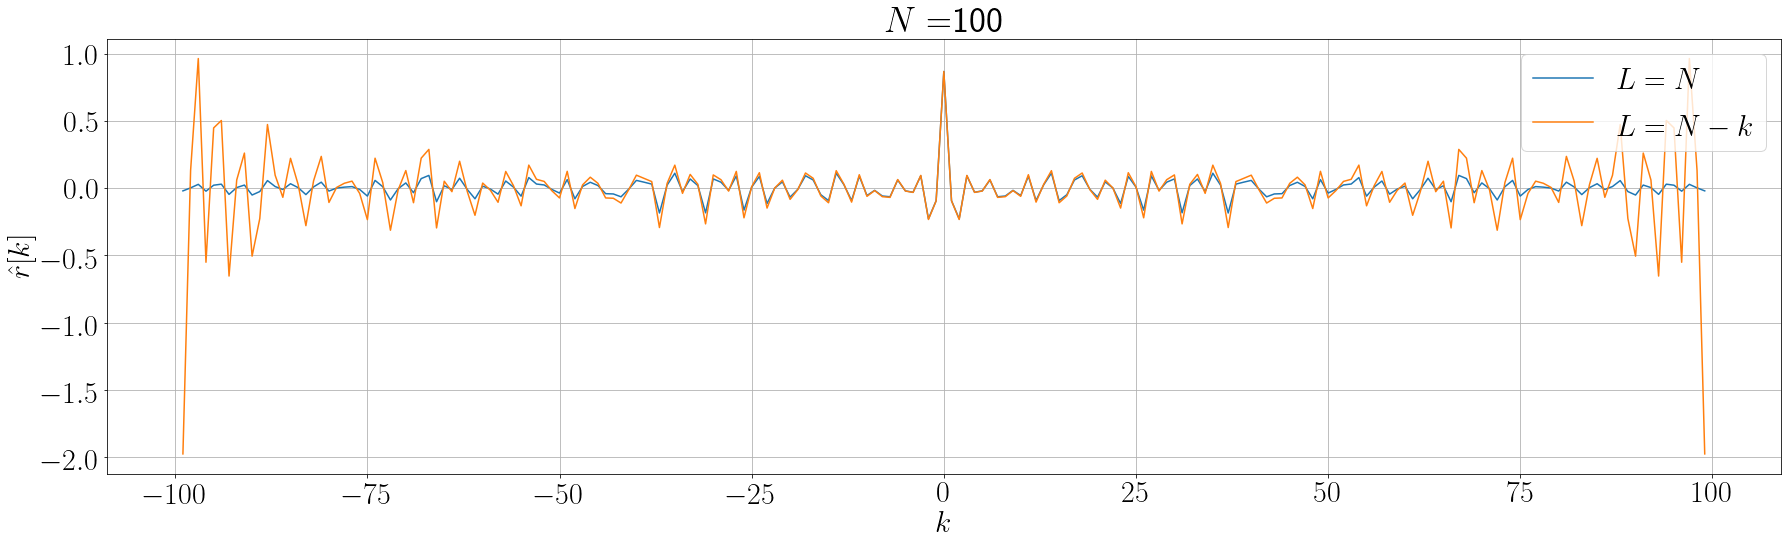

In [7]:
plt.plot( N_acf_range, acf_noise_biased, label='$L=N$')      
plt.plot( N_acf_range, acf_noise_unbiased, label='$L=N-k$')      

plt.xlabel('$k$')
plt.ylabel('$\hat{r}[k]$')   
plt.grid(True)    
plt.title('$N=$'+str(N))
plt.legend(loc='upper right') 

# Finding Power Spectral Density

### Functions for estimating correlogram out of acf and periodogram

In [13]:
########################
# periodogram estimator
########################
def find_periodogram(y, omega):
    """
    estimates periodogram out of the given observation at the frequencies specified in omega
    
    IN: observation y, frequencies
    OUT: psd estimator
    """
    N = len(y)
    per = np.zeros(len(omega), dtype=complex) 
        
    for p in np.arange(0, N):
        per += y[p] * np.exp( -1j * omega * (p+1) )
        
    per = ( abs(per)**2 )/ N
        
    return per   

    
########################
# correlogram estimator
########################
def find_correlogram(r, omega):
    """
    estimates correlogram out of the given acf at the frequencies specified in omega
    
    Remark: acf is assumed to be centered around 0
    
    IN: acf r, frequencies
    OUT: psd
    """
    corr = np.zeros(len(omega), dtype=complex )
  
    N = (len(r)+1)// 2
        
    # adding all terms
    for p in np.arange( -(N-1), (N-1)+1 ):
        corr += r[ p + (N-1) ] * np.exp( -1j * omega * p )
        
    # since there are minor numerical issues, resulting in negligible imaginary part, only real part is returned
    return np.real( corr )

### Parameters

In [14]:
# parameters: number of samples and according length of acf
N = int( 1e2 )
N_acf_range = np.arange( - N + 1, N, 1 )

# number of realizations for averaging    
N_real = int( 1e2 )

# relative width of rectangular and defining rect function
relative_width_rect = 0.1
N_rect = int( N * relative_width_rect )

rect = np.append( np.ones( N_rect), np.zeros( N - N_rect))


# number of freq. points and freq. range
N_freq = 512            
Ome = np.linspace(-np.pi, np.pi, N_freq)

### Loop for realizations

In [15]:
# initialize arrays for acf estimation
acf_rect_biased = np.zeros( len( N_acf_range ) )
acf_rect_unbiased = np.zeros( len( N_acf_range ) ) 

acf_noise_biased = np.zeros( len( N_acf_range ) )
acf_noise_unbiased = np.zeros( len( N_acf_range ) ) 

# initialize arrays for psd
psd_rect_per = np.zeros( len( Ome  ) )
psd_rect_cor_biased = np.zeros( len( Ome  ) )
psd_rect_cor_unbiased = np.zeros( len( Ome  ) )

psd_noise_per = np.zeros( len( Ome  ) )
psd_noise_cor_biased = np.zeros( len( Ome  ) )
psd_noise_cor_unbiased = np.zeros( len( Ome  ) )


# loop for realizations
for _k in range( N_real ):
    
    # rect function and noise only     
    rect_noisy = rect #+ np.random.normal(0.0, 0.2, N )
    noise_only = np.random.normal(0.0, 2.0, N )

    acf_rect_biased = est_acf( rect_noisy, 'biased')
    acf_rect_unbiased = est_acf( rect_noisy, 'unbiased')
    
    acf_noise_biased = est_acf( noise_only, 'biased') 
    acf_noise_unbiased = est_acf( noise_only, 'unbiased') 

    
    # find periodogram as well as correlograms
    psd_rect_per = 1. / (_k+1) *( _k * psd_rect_per + find_periodogram( rect_noisy, Ome ) )
    psd_rect_cor_biased = 1. / (_k+1) *( _k * psd_rect_cor_biased + find_correlogram( acf_rect_biased, Ome ) )
    psd_rect_cor_unbiased = 1. / (_k+1) *( _k * psd_rect_cor_unbiased + find_correlogram( acf_rect_unbiased, Ome ) )    
    
    psd_noise_per = 1. / (_k+1) *( _k * psd_noise_per + find_periodogram( noise_only, Ome ) )
    psd_noise_cor_biased = 1. / (_k+1) *( _k * psd_noise_cor_biased + find_correlogram( acf_noise_biased, Ome ) )
    psd_noise_cor_unbiased = 1. / (_k+1) *( _k * psd_noise_cor_unbiased + find_correlogram( acf_noise_unbiased, Ome ) )        

### Plotting

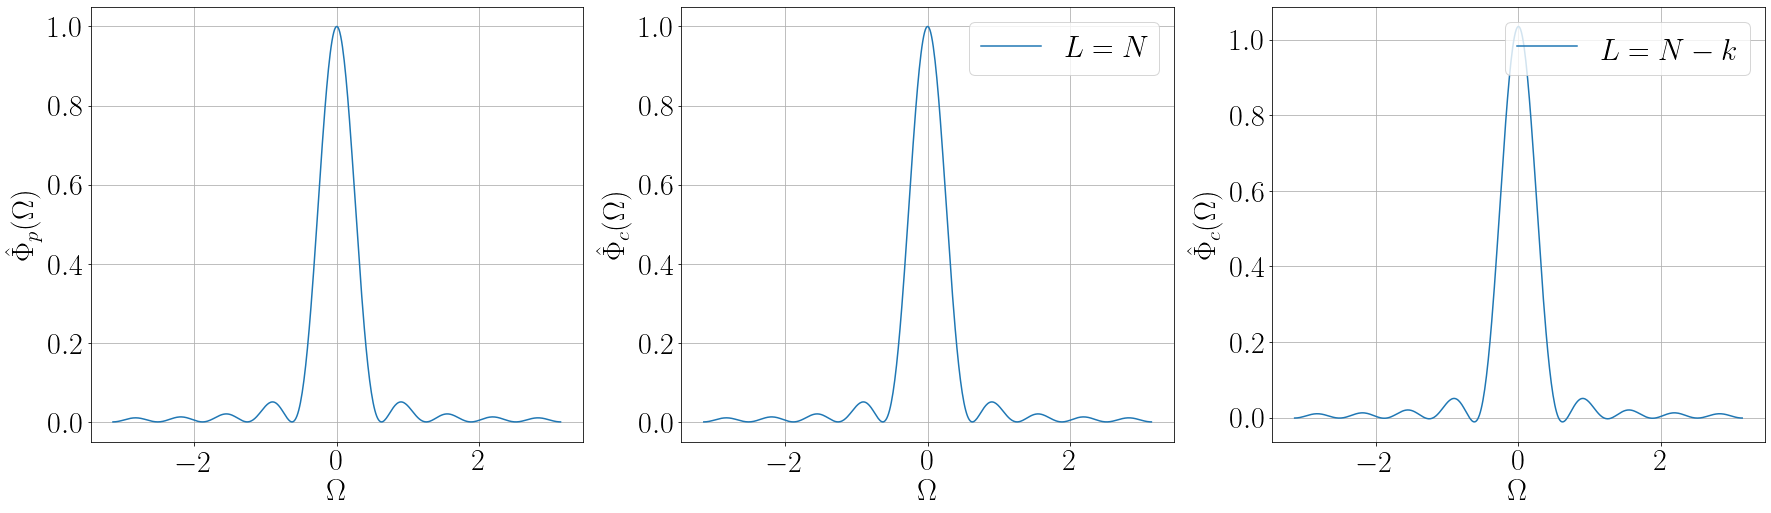

In [16]:
plt.subplot(131)    

plt.plot(Ome, psd_rect_per)      
plt.grid(True); 
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_p(\Omega)$')   

plt.subplot(132)    
plt.plot(Ome, psd_rect_cor_biased, label='$L=N$')      
plt.grid(True); plt.legend(loc='upper right') 
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_c(\Omega)$')       

plt.subplot(133)        
plt.plot(Ome, psd_rect_cor_unbiased, label='$L=N-k$')             
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_c(\Omega)$')   
plt.grid(True); plt.legend(loc='upper right') 


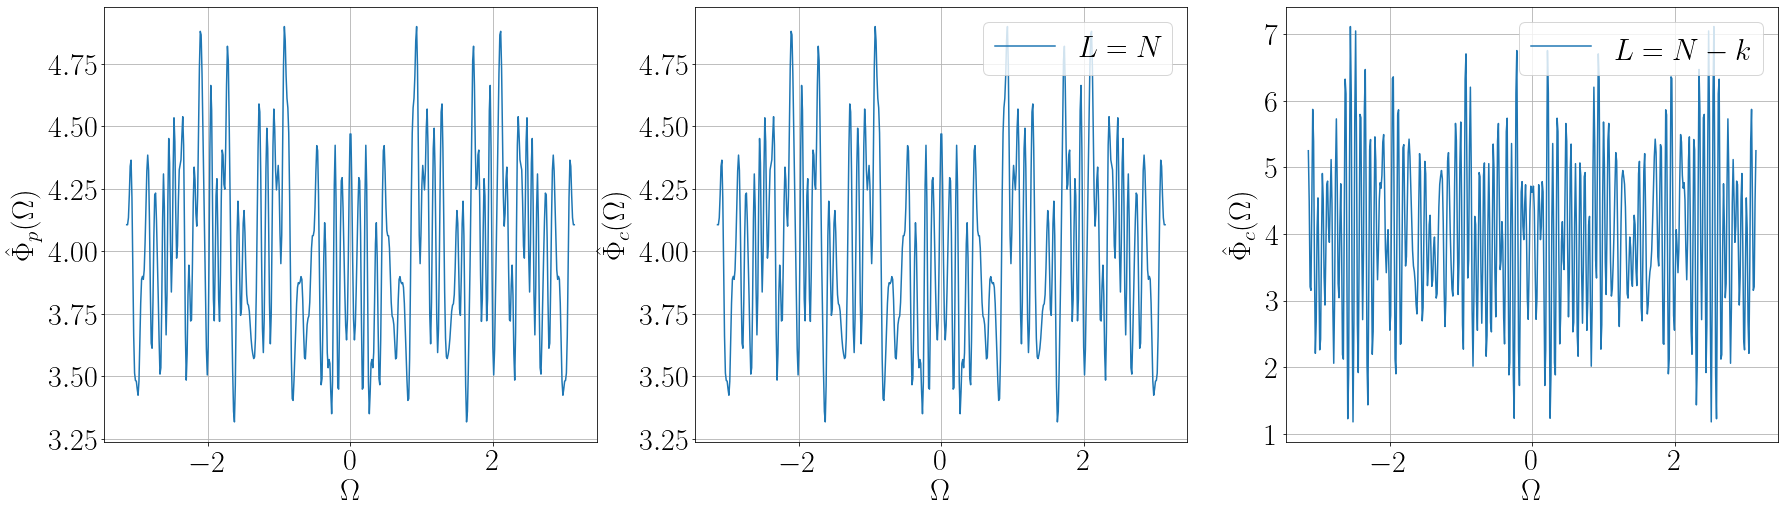

In [17]:
plt.subplot(131)    

plt.plot(Ome, psd_noise_per)      
#plt.plot(Ome_corr_1, psd_biased_1, label='corr., b')          
#plt.title('$N=$'+str(N_1))    
plt.grid(True); #plt.legend(loc='upper right') 
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_p(\Omega)$')   

plt.subplot(132)    
plt.plot(Ome, psd_noise_cor_biased, label='$L=N$')      
plt.grid(True); plt.legend(loc='upper right') 
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_c(\Omega)$')       

plt.subplot(133)        
plt.plot(Ome, psd_noise_cor_unbiased, label='$L=N-k$')             
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_c(\Omega)$')   
plt.grid(True); plt.legend(loc='upper right') 
